In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix # 분류에서 사용

from tensorflow import keras

In [36]:
# CSV 파일 불러오기
df = pd.read_csv("D:/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [37]:
# 열 이름 확인
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
# 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum()) 


결측치 확인:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [39]:
# 결측치 제거
mean_age = df['bmi'].mean() # Age 컬럼의 평균값 계산 (결측치를 제외한 값으로 계산)
df['bmi'] = df['bmi'].fillna(mean_age) # Age 컬럼의 결측치를 평균값으로 채우기

In [40]:
# 결측치 확인 (Age 컬럼 변경 후)
print("\n결측치 확인 (변경 후):")
print(df.isnull().sum()) 


결측치 확인 (변경 후):
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [41]:
# 레이블 개수 확인(imbalanced data) - 숫자
print("\n레이블 개수 확인:")
df['stroke'].value_counts()


레이블 개수 확인:


0    4861
1     249
Name: stroke, dtype: int64

In [42]:
# 인코딩(숫자)
label_encoder = LabelEncoder() # LabelEncoder 초기화
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']  # 인코딩할 컬럼 리스트
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
# 인코딩 확인
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [43]:
# 입력(X)과 출력(y) 분리
X = df.drop('stroke', axis=1).values
y = df['stroke'].values

In [44]:
X

array([[9.04600000e+03, 1.00000000e+00, 6.70000000e+01, ...,
        2.28690000e+02, 3.66000000e+01, 1.00000000e+00],
       [5.16760000e+04, 0.00000000e+00, 6.10000000e+01, ...,
        2.02210000e+02, 2.88932369e+01, 2.00000000e+00],
       [3.11120000e+04, 1.00000000e+00, 8.00000000e+01, ...,
        1.05920000e+02, 3.25000000e+01, 2.00000000e+00],
       ...,
       [1.97230000e+04, 0.00000000e+00, 3.50000000e+01, ...,
        8.29900000e+01, 3.06000000e+01, 2.00000000e+00],
       [3.75440000e+04, 1.00000000e+00, 5.10000000e+01, ...,
        1.66290000e+02, 2.56000000e+01, 1.00000000e+00],
       [4.46790000e+04, 0.00000000e+00, 4.40000000e+01, ...,
        8.52800000e+01, 2.62000000e+01, 0.00000000e+00]])

In [45]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
# 원-핫 인코딩
# (sigmoid, binary) 사용 시, 원 핫 인코딩 필요없음.
Y=y

In [47]:
# 학습용 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4088, 11), (1022, 11), (4088,), (1022,))

In [48]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(Dense(32,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
#model.add(Dense(2,activation='softmax'))
model.add(Dense(1, activation='sigmoid')) #-> 손실함수는 binary_crossentropy 사용

#model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\tjdus\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test,y_test)) # X_test, y_test로 하면 안됨!

y_pred = model.predict(X_test)

#y_test_class = np.argmax(y_test,axis=1)
y_test_class = y_test  # <= 그냥 그대로
#y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class = (y_pred > 0.5).astype(int)  # y_pred는 sigmoid로 나왔으니까 0.5 기준으로 0 또는 1로 변환

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4266 - loss: 1337.4744 - val_accuracy: 0.9462 - val_loss: 1.4802
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9292 - loss: 1.3888 - val_accuracy: 0.4716 - val_loss: 1.2245
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9036 - loss: 2.6456 - val_accuracy: 0.9462 - val_loss: 3.5452
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9255 - loss: 4.0023 - val_accuracy: 0.9472 - val_loss: 4.5397
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9189 - loss: 2.3614 - val_accuracy: 0.9472 - val_loss: 4.8042
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9250 - loss: 3.5981 - val_accuracy: 0.9472 - val_loss: 4.6690
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9094 - loss: 3.2368 - val_accuracy: 0.9472 - val_loss: 4.1134
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9110 - loss: 3.2335 - val_accuracy:

In [50]:
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.9423


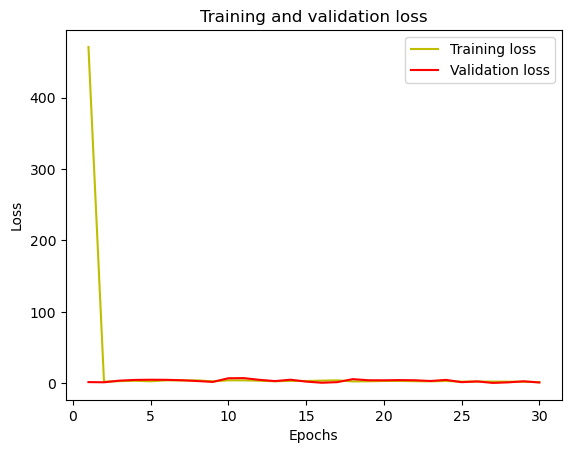

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

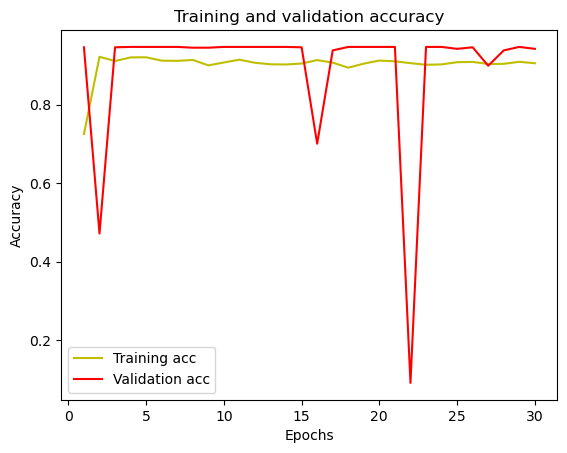

In [52]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.27      0.06      0.09        54

    accuracy                           0.94      1022
   macro avg       0.61      0.52      0.53      1022
weighted avg       0.91      0.94      0.92      1022

[[960   8]
 [ 51   3]]
